## Fall 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [4]:
db = pd.read_csv("C:/Users/maja0/iCloudDrive/Desktop/Shopify Screenshots/Dataset.csv")

In [6]:
db.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


#### 1.a Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [8]:
db.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The 'order_amount' column shows that there is a large std from the mean, which means that the starting value of 3145.13 driven from the mean value cannot be taken into account.

Considering the max value of 704000.00 there must be outliers dragging the mean. 

Below we can see that the median value is 284.00, which should make more sense in this case. 

In [17]:
db.order_amount.median()


284.0

<AxesSubplot:xlabel='order_amount'>

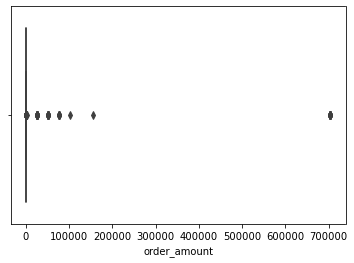

In [22]:
sns.boxplot(x=db['order_amount'])


As suspected, there are many outliers in this dataset. We can investigate further by locating only the outliers in the dataset.

In [24]:
outliers = db.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
outliers.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Let's check the outliers that occured more than once.

In [28]:
db.loc[db['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


So, for the lower side of the outliers amounts, we can see that there are products that cost 25725, higher than average, but they still make sense. 

For the higher end amounts, they all show up at the same store, same buyer, at the same time each given day, with the same month. Possibly, it was a sale to another retailer. It should be further investigated within the store. 

One way to deal with outliers is Trimming. We will remove the outliers completely, all of those greater than 25725.00.

In [32]:
index = db[(db['order_amount'] >= 25725)].index
db.drop(index, inplace=True)
db['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

#### 1.b What metric would you report for this dataset?
#### 1.c What is its value?


By trimming out the outliers, we can use the mean value of 302.58, or we can choose to use the median value of 284.00.